<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [13]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [14]:
#datos

df=pd.read_csv('data/cookie_cats.csv')

df.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


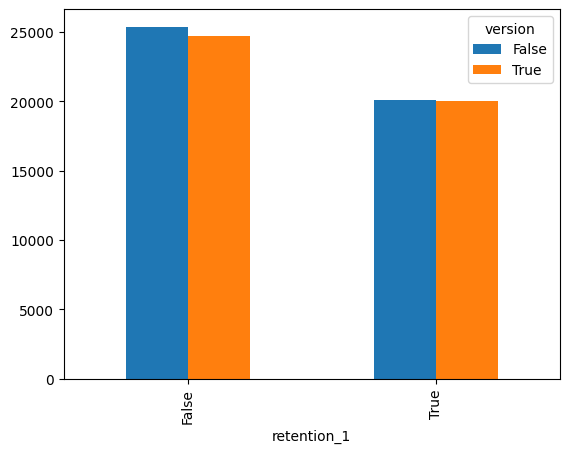

In [15]:
pd.crosstab(df.retention_1,df['version']=='gate_30').plot(kind='bar');


In [16]:
# transformacion

df.version=np.where(df.version=='gate_30', 'A', 'B')

df.retention_1=np.where(df.retention_1==True, 1, 0)
df.retention_7=np.where(df.retention_7==True, 1, 0)

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0
3,483,B,1,0,0
4,488,B,179,1,1


In [17]:
# muestreo
len(df[df.version=='A'])


44700

In [18]:
len(df[df.version=='B'])


45489

In [24]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0
3,483,B,1,0,0
4,488,B,179,1,1


In [19]:
pd.crosstab(df.retention_1, df.version)

version,A,B
retention_1,,
0,24666,25370
1,20034,20119


In [20]:
pd.crosstab(df.retention_7, df.version)


version,A,B
retention_7,,
0,36198,37210
1,8502,8279


In [25]:
# testeo para retention_1
from statsmodels.stats.proportion import proportions_ztest, proportion_confint



In [28]:
control = df.retention_1.loc[df.version=='gate_30']

tratamiento = df.retention_1.loc[df.version=='gate_40']
df.retention_1 = df.retention_1.astype(int)
df.retention_7 = df.retention_7.astype(int)

In [34]:
control_res=ab_test[ab_test.version=='A']['retention_1']
tratamiento_res=ab_test[ab_test.version=='B']['retention_1']




In [35]:
n_con=control_res.count()      
n_trat=tratamiento_res.count()



In [36]:
conversiones=[control_res.sum(), tratamiento_res.sum()] 

observaciones=[n_con, n_trat]  

z_score, p_value = proportions_ztest(conversiones, nobs=observaciones)


(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(conversiones, nobs=observaciones, alpha=0.05)

print(z_score)
print(p_value)
print(control_a,control_b)
print(tratamiento_a,tratamiento_b)

1.6819955362954377
0.09256970548110562
0.4437848514276267 0.4530787849360097
0.4381542505752162 0.4474366585156929


In [37]:
ab_test.groupby('version').retention_1.mean(), ab_test.groupby('version').retention_1.std()

(version
 A    0.448432
 B    0.442795
 Name: retention_1, dtype: float64,
 version
 A    0.497339
 B    0.496723
 Name: retention_1, dtype: float64)

In [22]:
# testeo para retention_7

control=df[df.version=='A'].sample(n=44000, random_state=42)

tratamiento=df[df.version=='B'].sample(n=44000, random_state=42)z_score, p_value

ab_test=pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,6531033,A,35,0,0
1,8003009,A,4,0,0
2,5566807,A,23,1,0
3,64235,A,1,0,0
4,6210551,A,7,0,0


In [38]:
print (z_score, p_value)

1.6819955362954377 0.09256970548110562


In [23]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
pvalue menor que 0.05 así que creo que no podemos negar h0 y nos quedamos como estamos.
